In [154]:
# Este notebook reune los Indices de los Commodities, extraidos de una base de datos en formato xlsx. del
#  Fondo Monetario Internacional, al cual puede accederse con el enlace abajo:
#      https://docs.google.com/spreadsheets/d/1pJewns-8gIg4QdaNZDFHK8MyVGx6KDKn/edit#gid=321170148

#   La finalidad de este notebook es la de realizar 
#     1) Data aquisition 2) Data Wrangling 3) Explotatory Analysis 4) Visualizations

#     Para poder utilizar posteriormente esta data como una variable mas de un modelo de ML. 


In [155]:
# Dark Mode: Correr opcional

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

In [156]:
# Importacion Librerias

import pandas as pd
import pandas_profiling
from functools import reduce
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter




In [157]:
#File Location

archivo = 'Desktop\IMF_Commodities.xlsx'

In [158]:
#Importamos dataset.

df_commodities= pd.read_excel(archivo, sheet_name=0)

df_commodities.head(10)

,Commodity,PALLFNF,PEXGALL,PNFUEL,PFANDB,PFOOD,PBEVE,PINDU,PAGRI,PRAWM,PALLMETA,PMETA,PPMETA,PEXGMETA,PFERT,PNRG,POILAPSP,PNGAS,PCOAL
0,Commodity.Description,"All Commodity Price Index, 2016 = 100, include...","Commodities for Index: All, excluding Gold, 20...","Non-Fuel Price Index, 2016 = 100, includes Pre...","Food and Beverage Price Index, 2016 = 100, inc...","Food Price Index, 2016 = 100, includes Cereal,...","Beverage Price Index, 2016 = 100, includes Cof...","Industrial Inputs Price Index, 2016 = 100, inc...","Agriculture Price Index, 2016 = 100, includes ...","Agricultural Raw Materials Index, 2016 = 100, ...","All Metals Index, 2016 = 100: includes Metal P...","Base Metals Price Index, 2016 = 100, includes ...","Precious Metals Price Index, 2016 = 100, inclu...","All Metals EX GOLD Index, 2016 = 100: includes...","Fertilizer Index, 2016 = 100, includes DAP, Po...","Fuel (Energy) Index, 2016 = 100, includes Crud...","Crude Oil (petroleum), Price index, 2016 = 100...","Natural Gas Price Index, 2016 = 100, includes ...","Coal Price Index, 2016 = 100, includes Austral..."
1,Data Type,Index,Index,Index,Index,Index,Index,Index,Index,Index,Index,Index,Index,Index,Index,Index,Index,Index,Index
2,Frequency,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly
3,1990M1,NaN,NaN,NaN,NaN,NaN,49.20388,NaN,NaN,72.855085,NaN,NaN,33.097764,NaN,NaN,NaN,NaN,NaN,51.172528
4,1990M2,NaN,NaN,NaN,NaN,NaN,49.947777,NaN,NaN,73.449658,NaN,NaN,33.701146,NaN,NaN,NaN,NaN,NaN,51.172528
5,1990M3,NaN,NaN,NaN,NaN,NaN,54.434712,NaN,NaN,74.172077,NaN,NaN,31.811295,NaN,NaN,NaN,NaN,NaN,51.172528
6,1990M4,NaN,NaN,NaN,NaN,NaN,56.292064,NaN,NaN,76.022077,NaN,NaN,30.422053,NaN,NaN,NaN,NaN,NaN,51.172528
7,1990M5,NaN,NaN,NaN,NaN,NaN,55.920823,NaN,NaN,75.418959,NaN,NaN,30.077283,NaN,NaN,NaN,NaN,NaN,54.120417
8,1990M6,NaN,NaN,NaN,NaN,NaN,53.061015,NaN,NaN,75.563455,NaN,NaN,28.805239,NaN,NaN,NaN,NaN,NaN,55.284677
9,1990M7,NaN,NaN,NaN,NaN,NaN,52.830834,NaN,NaN,76.236284,NaN,NaN,29.489652,NaN,NaN,NaN,NaN,NaN,55.284677


In [159]:
df_commodities.shape

(388, 19)

In [160]:
df_commodities.columns

Index(['Commodity', 'PALLFNF', 'PEXGALL', 'PNFUEL', 'PFANDB', 'PFOOD', 'PBEVE',
       'PINDU', 'PAGRI', 'PRAWM', 'PALLMETA', 'PMETA', 'PPMETA', 'PEXGMETA',
       'PFERT', 'PNRG', 'POILAPSP', 'PNGAS', 'PCOAL'],
      dtype='object')

In [161]:
#Limpiamos el Dataframe de Indices irrelevantes, conservando los mas generales. 

df_comm = df_commodities.drop(columns=['PFANDB','PEXGALL','PNFUEL','PBEVE','PAGRI','PMETA','PPMETA','PEXGMETA','POILAPSP','PNGAS','PCOAL','PFERT'])

In [162]:
df_comm.describe()

,Commodity,PALLFNF,PFOOD,PINDU,PRAWM,PALLMETA,PNRG
count,388,232,364,364,388,364,364
unique,388,232,364,364,388,364,364
top,Commodity.Description,"All Commodity Price Index, 2016 = 100, include...","Food Price Index, 2016 = 100, includes Cereal,...","Industrial Inputs Price Index, 2016 = 100, inc...","Agricultural Raw Materials Index, 2016 = 100, ...","All Metals Index, 2016 = 100: includes Metal P...","Fuel (Energy) Index, 2016 = 100, includes Crud..."
freq,1,1,1,1,1,1,1


In [163]:
#Definimos esta funcion para el recorte de las filas indeseadas.
# Estas representan, de 1991 al 2019, o de la fila 3 a la 351 del indice. 
# Tambien dropeamos las primeras 3 filas, ya que luego incluiremos esta informacion de forma mas practica.

df_recorte = df_comm.index[0:351]

In [164]:
#Dropeamos ahora las filas 

df_comm.drop(labels=(df_recorte), axis=0, index=None, inplace=True, errors='raise')
df_comm.head(20)

,Commodity,PALLFNF,PFOOD,PINDU,PRAWM,PALLMETA,PNRG
351,2019M1,117.078244,100.466542,118.836909,103.53615,114.711385,133.302098
352,2019M2,119.011525,98.772205,125.808562,103.60878,120.811052,136.048817
353,2019M3,119.910036,98.06311,127.539176,105.409046,121.105733,138.256367
354,2019M4,123.416731,101.569201,129.656529,104.681017,121.924057,143.768294
355,2019M5,120.477541,98.094289,129.330578,105.43636,121.161561,139.410557
356,2019M6,115.528942,100.212841,130.989096,104.958595,125.339086,123.532319
357,2019M7,117.967954,100.271974,134.433558,101.490499,130.726497,126.889777
358,2019M8,112.094914,98.26043,123.198447,97.621066,126.910558,118.180128
359,2019M9,114.809066,96.053058,124.101686,97.359429,128.684621,123.742531
360,2019M10,113.009014,96.3822,121.736305,95.920179,126.835339,120.505405


In [165]:
df_comm.shape

(37, 7)

In [166]:
#Reindexamos

df_comm.reset_index(drop=True, inplace=True)
df_comm

,Commodity,PALLFNF,PFOOD,PINDU,PRAWM,PALLMETA,PNRG
0,2019M1,117.078244,100.466542,118.836909,103.53615,114.711385,133.302098
1,2019M2,119.011525,98.772205,125.808562,103.60878,120.811052,136.048817
2,2019M3,119.910036,98.06311,127.539176,105.409046,121.105733,138.256367
3,2019M4,123.416731,101.569201,129.656529,104.681017,121.924057,143.768294
4,2019M5,120.477541,98.094289,129.330578,105.43636,121.161561,139.410557
5,2019M6,115.528942,100.212841,130.989096,104.958595,125.339086,123.532319
6,2019M7,117.967954,100.271974,134.433558,101.490499,130.726497,126.889777
7,2019M8,112.094914,98.26043,123.198447,97.621066,126.910558,118.180128
8,2019M9,114.809066,96.053058,124.101686,97.359429,128.684621,123.742531
9,2019M10,113.009014,96.3822,121.736305,95.920179,126.835339,120.505405


In [167]:
#Renombramos columnas

df_comm.rename(columns={'Commodity': 'Año', 'PALLFNF': 'Promedio',
                        'PFOOD': 'Alimentos', 'PINDU': 'Industrial'
                       , 'PRAWM': 'Agro', 'PALLMETA': 'Metales'
                       , 'PNRG': 'Energia'
                       }, inplace=True)
df_comm.head(5)

,Año,Promedio,Alimentos,Industrial,Agro,Metales,Energia
0,2019M1,117.078244,100.466542,118.836909,103.53615,114.711385,133.302098
1,2019M2,119.011525,98.772205,125.808562,103.60878,120.811052,136.048817
2,2019M3,119.910036,98.06311,127.539176,105.409046,121.105733,138.256367
3,2019M4,123.416731,101.569201,129.656529,104.681017,121.924057,143.768294
4,2019M5,120.477541,98.094289,129.330578,105.43636,121.161561,139.410557


In [168]:
#Ponemos un titulo que asista a interpretar con sencillez la data.

df_comm.style.set_caption("Indices Mundiales de Commodities (En USD y obtenidos con frecuencia mensual)")

,Año,Promedio,Alimentos,Industrial,Agro,Metales,Energia
0,2019M1,117.078244,100.466542,118.836909,103.536150,114.711385,133.302098
1,2019M2,119.011525,98.772205,125.808562,103.608780,120.811052,136.048817
2,2019M3,119.910036,98.063110,127.539176,105.409046,121.105733,138.256367
3,2019M4,123.416731,101.569201,129.656529,104.681017,121.924057,143.768294
4,2019M5,120.477541,98.094289,129.330578,105.436360,121.161561,139.410557
5,2019M6,115.528942,100.212841,130.989096,104.958595,125.339086,123.532319
6,2019M7,117.967954,100.271974,134.433558,101.490499,130.726497,126.889777
7,2019M8,112.094914,98.260430,123.198447,97.621066,126.910558,118.180128
8,2019M9,114.809066,96.053058,124.101686,97.359429,128.684621,123.742531
9,2019M10,113.009014,96.382200,121.736305,95.920179,126.835339,120.505405


In [169]:
#     Guardamos DF como CSV, y lo importamos para seguir trabajando desde el, para facilitar el acceso desde colab.

df_comm.to_csv('Commodities.csv')

In [170]:
#    Hasta aqui, el dataframe de Commodities que mas adelante 
#         utilizaremos para correlacionar con otras variables.


In [171]:
#      A partir de aqui, analisis Univariado de "df_comm"

In [172]:
#        Exploremos mas la data 

df_comm.describe()

,Año,Promedio,Alimentos,Industrial,Agro,Metales,Energia
count,37,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000
unique,37,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000
top,2019M1,117.078244,100.466542,118.836909,103.53615,114.711385,133.302098
freq,1,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [173]:
df_comm.count()

#Tenemos 24 observaciones, que se corresponden a 24 meses, es decir, 2 años. 

Año           37
Promedio      37
Alimentos     37
Industrial    37
Agro          37
Metales       37
Energia       37
dtype: int64

In [174]:
df_comm.describe().T

,count,unique,top,freq
Año,37,37,2019M1,1
Promedio,37.0,37.0,117.078244,1.0
Alimentos,37.0,37.0,100.466542,1.0
Industrial,37.0,37.0,118.836909,1.0
Agro,37.0,37.0,103.53615,1.0
Metales,37.0,37.0,114.711385,1.0
Energia,37.0,37.0,133.302098,1.0


<AxesSubplot:>

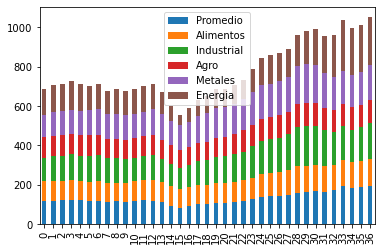

In [175]:
#Comencemos con un grafico de barras acumulado:
#  Toma el indice (representante del tiempo) como ejeX.

df_comm.plot.bar(stacked=True)

<AxesSubplot:xlabel='Año'>

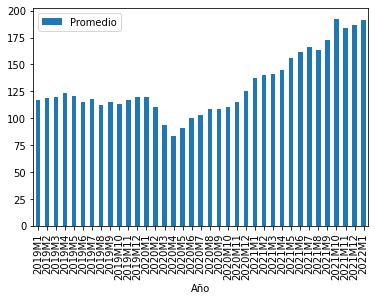

In [176]:
#Otro solo para la variable Total
# Se puede observar que el precio solo va para arriba.

df_comm.plot.bar(x='Año', y='Promedio')

In [177]:
#Seleccionamos el ultimo mes disponible para realizar una visualizacion

df_2022M1 = (df_comm.loc[[36]])
df_2022M1.drop(columns=['Promedio','Año'], inplace=True)    #Dejamos solo las variables a comparar
df_2022 = df_2022M1.transpose()                             # Invertimos filas y columnas para facilitar la visualizacion
df_2022

,36
Alimentos,139.821403
Industrial,182.84623
Agro,117.708599
Metales,177.855471
Energia,242.756336


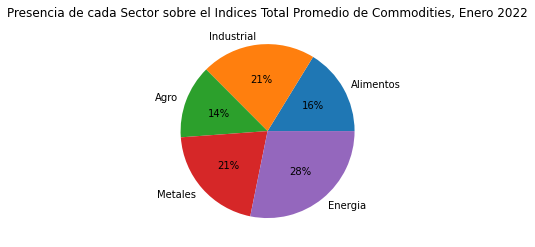

In [179]:
# Hagamos un grafico de torta para visualizar cuanto ocupa cada Rubro dentro del indice promedio para el ultimo año


x = (df_2022[36])
labels = ['Alimentos', 'Industrial', 'Agro', 'Metales', 'Energia']

fig, ax = plt.subplots()
ax.pie(x, labels = labels,autopct='%.0f%%', radius=1)
ax.set_title('Presencia de cada Sector sobre el Indices Total Promedio de Commodities, Enero 2022')
plt.show()